<font style="font-size:28px;" align="left"><b>Operations on the Unit Circle  </b></font>
<br>
adapted from by Abuzer Yakaryilmaz_
<br>

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

<h3>Scenario 1</h3>

We start with drawing the quantum states $ \ket{0} $ and $ \ket{+} = \myvector{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} } $.

<i style="font-size:10pt;">
Our predefined function "draw_qubit()" draws a figure, the origin, the axes, the unit circle, and base quantum states.
<br>
Our predefined function "draw_quantum_state(x,y,name)" draws an arrow from (0,0) to (x,y) and associates it with <u>name</u>.
<br>
We include our predefined functions with the following line of code:
    
    %run quantum.py
</i>   

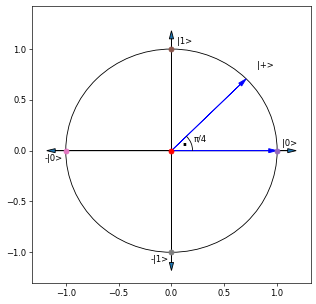

In [14]:
%run quantum.py # rrquires quantum.py

draw_qubit()    #defined in quantum.py which also requires qworld folder 

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')
show_plt()

<h3> Task 1 (Discussion) </h3>

When starting in the state $ \ket{0} $, we apply a quantum operator, say $ M $, then we obtain the state $\ket{+}$.

If we apply the operator $ M $ once more, what can be the next state?

How can we classify possible $ M $'s geometrically? How can we parameterize each possible $ M $?

answer: Rotation gate? Hadammard operator, if you apply it once more you'll get back to |0>

<h3>Scenario 2</h3>

We draw the quantum states $ \ket{1} $ and $ \ket{-} = \stateminus $.

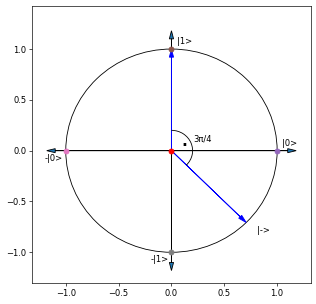

In [15]:
%run quantum.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=-45,theta2=90) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'3\u03C0/4')
show_plt()

<h3> Task 2 (Discussion) </h3>

When starting in the state $ \ket{1} $, we apply a quantum operator, say $ M $, then we obtain the state $\ket{-}$.

If we apply the operator $ M $ again, what can be the next state?

How can we parameterize each possible $ M $?

<hr>
<h3>Initialize a (real-valued) qubit with an arbitrary state</h3>

A qubit is set to the state $\ket{0}$ at the beginning.

Any real-valued quantum state is a point in the unit circle, and it can be described by an angle, say $\theta$:

For $ \theta \in [0,2\pi) $, the quantum state is $ \ket{v} = \myvector{\cos \theta \\ \sin \theta} $.

We can set the qubit to the state $ \ket{v} $ by using a rotation operator between $ \ket{0} $ and $ \ket{1} $ with angle $ \theta $.

<h3>Rotations with ry-gate</h3>

In Pennylane, the ry-gate can be used for the rotations on the unit circle.

The default direction of a rotation by ry-gate is counterclockwise. It is used as follows:

    qml.RY(theta, wires=0) 

<i>Technical remark: ry-gate is defined on <a href="https://en.wikipedia.org/wiki/Bloch_sphere" target="_blank">Bloch sphere</a>. The states $ \ket{0} $ and $ \ket{1} $ are placed on the poles of Bloch sphere, and so the angle between them is $ \pi $ on Bloch sphere. On the other hand, the angles between the states $ \ket{0} $ and $ \ket{1} $ on the unit circle is $ \frac{\pi}{2} $. Therefore, when using ry-gate, we provide twice of $ \theta $ for a rotation with angle $\theta$ on the unit circle.</i>

In [16]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

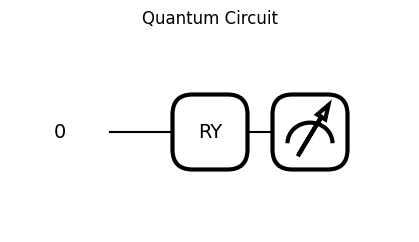

In [17]:

# Set up device with 1 qubit and 1000 shots
dev_rotation = qml.device("default.qubit", wires=1, shots=1000)

# Define the QNode
@qml.qnode(dev_rotation)
def rotation_circuit(theta):
    qml.RY(theta, wires=0)
    return qml.sample(qml.PauliZ(0))  # simulate measurement

# Define the rotation angle (same as Qiskit: 2 * pi / 3)
theta = 2 * np.pi / 3

# --- Draw the circuit ---
fig, ax = qml.draw_mpl(rotation_circuit)(theta)
plt.title("Quantum Circuit")
plt.show()

{'0': 256, '1': 744}


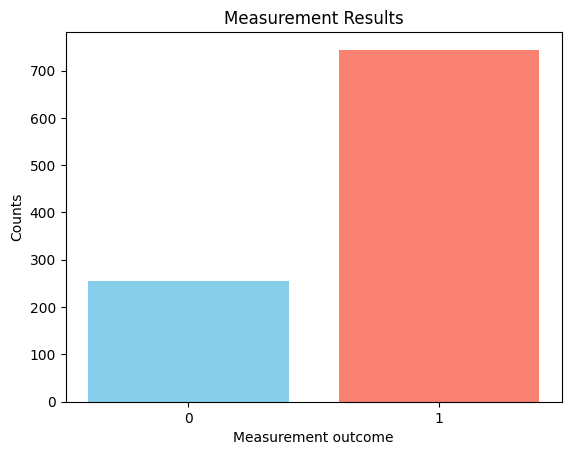

In [18]:
# --- Run the circuit and get measurement samples ---
samples = rotation_circuit(theta)

# Convert +1/-1 to 0/1 (Z-basis to bitstring)
bits = (1 - samples) // 2

# Count 0s and 1s
counts = {"0": int(np.sum(bits == 0)), "1": int(np.sum(bits == 1))}
print(counts)

# --- Plot histogram ---
plt.bar(counts.keys(), counts.values(), color=["skyblue", "salmon"])
plt.xlabel("Measurement outcome")
plt.ylabel("Counts")
plt.title("Measurement Results")
plt.show()

In [19]:
from math import sin,cos

# the quantum state
rotation_angle = theta
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]
print("The quantum state is",round(quantum_state[0],4),"|0> +",round(quantum_state[1],4),"|1>")

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The quantum state is -0.5 |0> + 0.866 |1>
The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


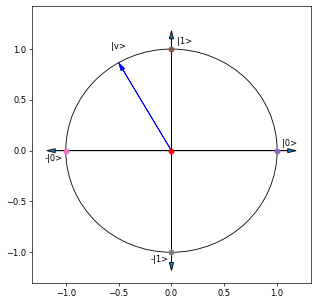

In [20]:
# draw the quantum state

%run quantum.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

<h3> Task 3</h3>

Randomly pick an angle $ \theta \in [0,2\pi) $.

Suppose that we have 1000 copies of quantum state $ \ket{v} = \myvector{ \cos \theta \\ \sin \theta } $ and we measure each of them.

What are the expected numbers of observing the states 0 and 1?

Implement the above experiment by designing a quantum circuit and set the quantum state by using ry-gate.

Compare your experimental and analytic results.

Repeat the task a couple of times.

In [21]:
from random import randrange
from math import sin,cos, pi

# randomly pick an angle
random_angle = randrange(360)
print("random angle is",random_angle)

# pick angle in radian
rotation_angle = random_angle/360*2*pi

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

random angle is 121
The expected value of observing '0' is 265.2642
The expected value of observing '1' is 734.7358


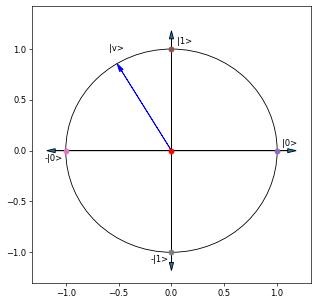

In [22]:
# draw the quantum state

%run quantum.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

show_plt()

**Experimental results**

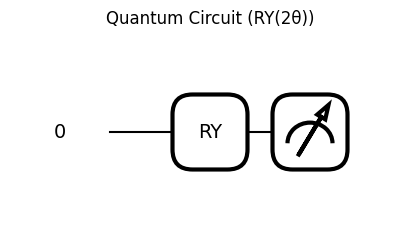

In [23]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define device with 1 qubit and 1000 shots
dev = qml.device("default.qubit", wires=1, shots=1000)

# QNode using RY(2θ) to match Qiskit behavior
@qml.qnode(dev)
def circuit(theta):
    qml.RY(2 * theta, wires=0)
    return qml.sample(qml.PauliX(0))  # measure in Z basis

# --- Draw the Circuit ---
fig, ax = qml.draw_mpl(rotation_circuit)(rotation_angle)
plt.title("Quantum Circuit (RY(2θ))")
plt.show()



{'0': 71, '1': 929}


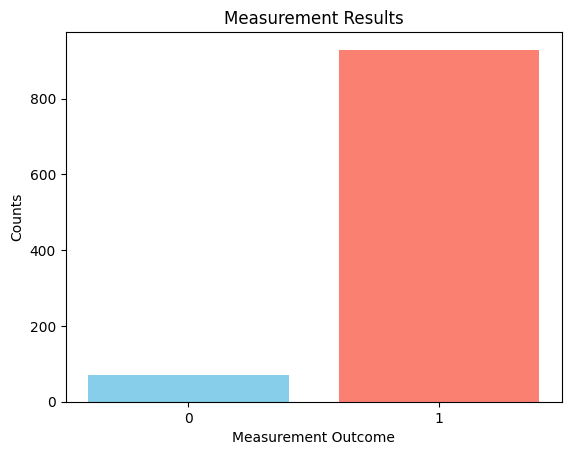

In [24]:
# Run the circuit
samples = circuit(rotation_angle)

# Convert results: +1 → 0, -1 → 1
bit_samples = (1 - samples) // 2

# Count results
count_0 = int(np.sum(bit_samples == 0))
count_1 = int(np.sum(bit_samples == 1))
counts = {"0": count_0, "1": count_1}

print(counts)

the_observed_number_of_ones = counts["1"]

# Histogram
plt.bar(counts.keys(), counts.values(), color=["skyblue", "salmon"])
plt.xlabel("Measurement Outcome")
plt.ylabel("Counts")
plt.title("Measurement Results")
plt.show()

Compare the results

In [25]:
difference = abs(the_expected_number_of_ones - the_observed_number_of_ones)
print("The expected number of ones is", the_expected_number_of_ones)
print("The observed number of ones is", the_observed_number_of_ones)
print("The difference is", difference)
print("The difference in percentage is", difference / 100, "%")

The expected number of ones is 734.7357813929455
The observed number of ones is 929
The difference is 194.26421860705454
The difference in percentage is 1.9426421860705454 %
